# Support Vector Machine (SVM)

<font size = "3" >
<ul>
  <li>SVM finds an optimal hyperplane that best segregates observations from different classes.</li>
  <li> A hyperplane is a plane of n -1 dimension that separates the n dimensional feature space of the observations into two spaces.</li>
  <li> The hyperplane in a two-dimensional feature space is a line, and a surface in a three-dimensional feature space. The optimal hyperplane is picked so that the distance from its nearest points in each space to itself is maximized. And these nearest points are the so-called support vectors.</li>
</ul>  
</font>

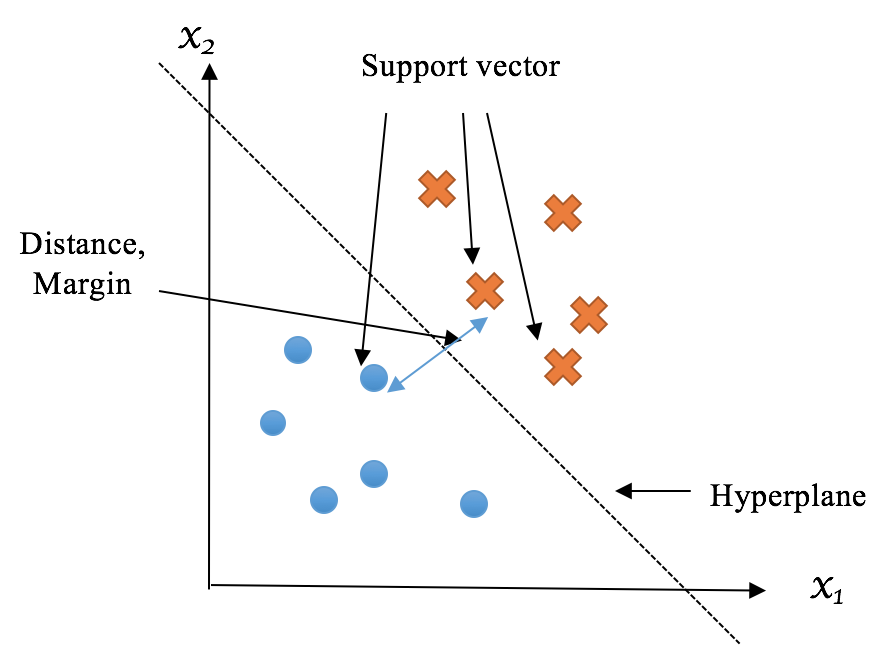

In [4]:
from IPython.display import Image
Image(filename='./images/svm.png', width=400)

<b>Note</b> :Based on the preceding stated definition of SVM, there can be an infinite number of feasible hyperplanes. How can we identify the optimal one? Let's discuss the logic behind SVM in further detail through a few cases. 

## Case 1: Identifying a separating hyperplane <br>
<font size="3">First, we need to understand what qualifies for a separating hyperplane. In the following example, hyperplane C is the only correct one, as it successfully segregates observations by their labels, while hyperplanes A and B fail:</font>

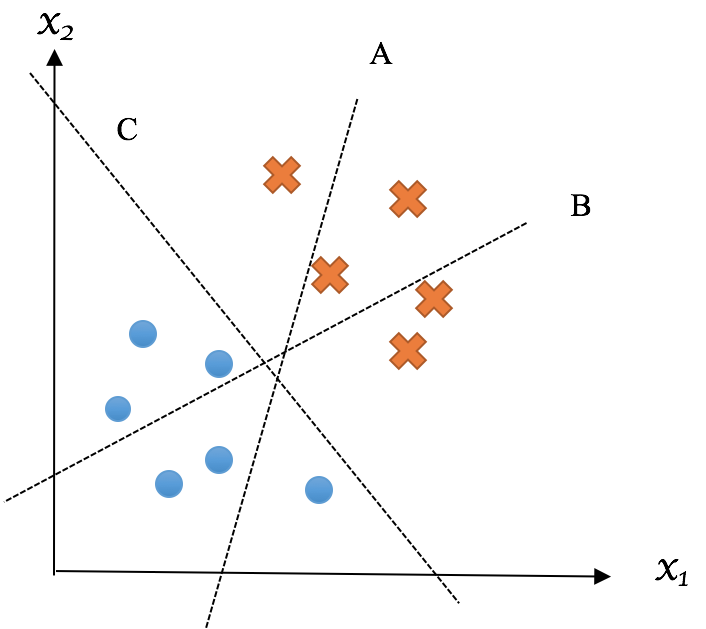

In [5]:
Image(filename='./images/svmhyper1.png', width=300)

 ## A separating hyperplane in a formal or mathematical way

<font size = "3">

- In a two-dimensional space, a line can be defined by a slope vector w (represented as a two-dimensional vector), and an intercept b. 
- Similarly, in a space of n dimensions, a hyperplane can be defined by an n-dimensional vector w, and an intercept b. Any data point x on the hyperplane satisfies wx + b = 0.
- A hyperplane is a separating hyperplane if the following conditions are satisfied: 

<font color="Blue">
    For any data point x from one class, it satisfies <b>wx + b > 0</b><br>
    For any data point x from another class, it satisfies<b> wx + b < 0</b></font><br><br>
    
 <note> However, there can be countless possible solutions for w and b. You can move or rotate hyperplane C to certain extents and it still remains a separating hyperplane. So next, we will learn how to identify the best hyperplane among possible separating hyperplanes.
</font>

## Case 2:Determining the optimal hyperplane

<font size="3"> hyperplane C is the preferred one as it enables the maximum sum of the distance between the nearest data point in the positive side to itself and the distance between the nearest data point in the negative side to itself</font>

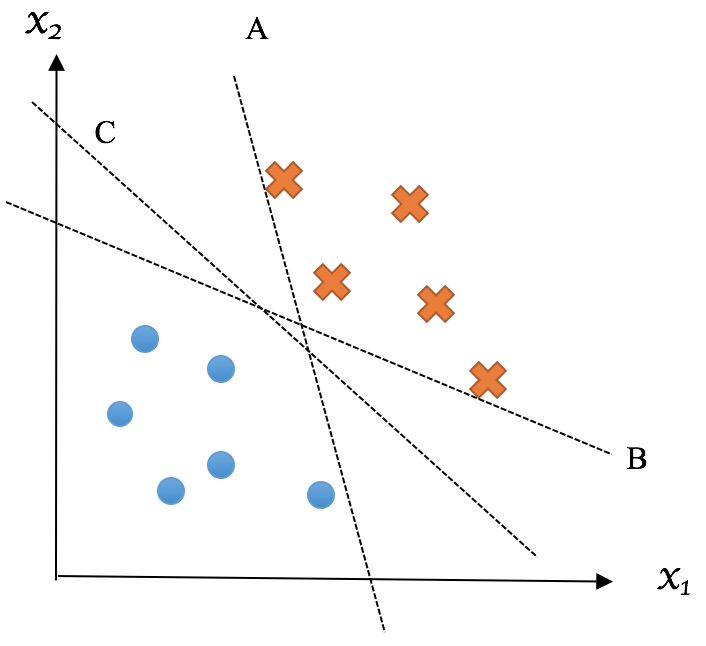

In [7]:
Image(filename='./images/svmhyper2.png', width=300)

<font size="3">
    
<ul><li>The nearest point(s) in the positive side can constitute a hyperplane parallel to the decision hyperplane, which we call a <b>Positive hyperplane</b>.</li>
    
<li> on the other hand, the nearest point(s) in the negative side constitute the <b>Negative hyperplane.</b></li>
<li>The perpendicular distance between the<b> positive and negative hyperplanes is called the Margin </b></li><ul>
<font color="blue"> whose value equates to the sum of the two aforementioned distances. A Decision hyperplane is deemed optimal if the margin is maximized.</font>
</font>

<font size="3"><b>The optimal (also called maximum-margin) hyperplane and distance margins for a trained SVM model</b> are illustrated in the following diagram. Again, samples on the margin (two from one class, and one from another class, as shown) are the so-called support vectors:</font>

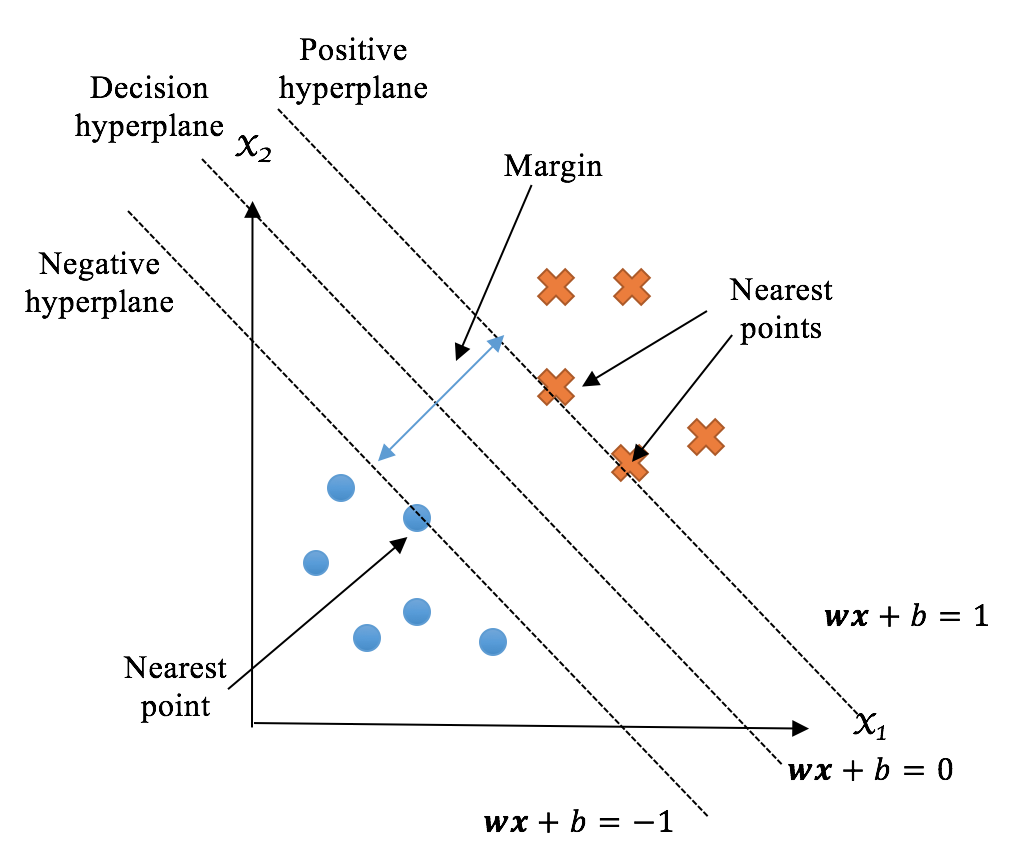

In [9]:
Image(filename='./images/svmhyper.png', width=500)

<font size="3">We can interpret it in a mathematical way by first describing the positive and negative hyperplanes as follows:</font>

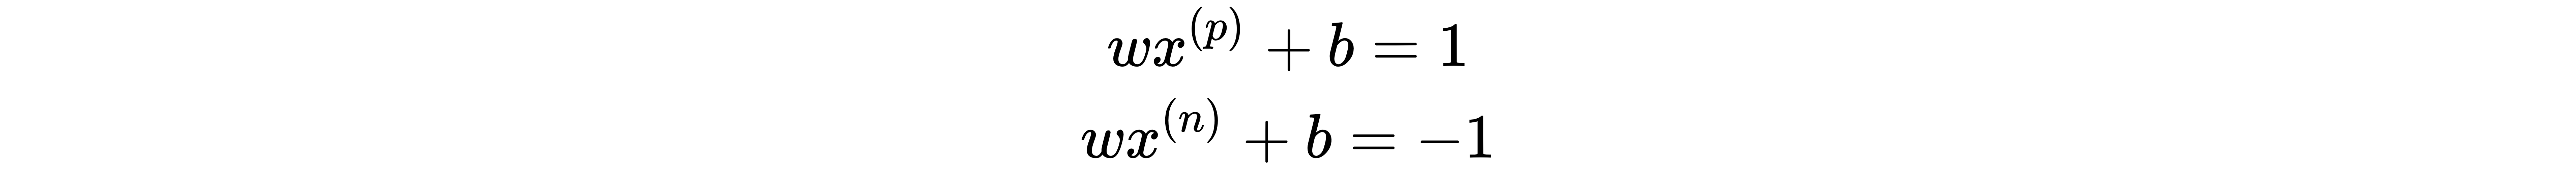

In [13]:
Image(filename='./images/svmequ.png', width=800)

<font size="3">Here,  is a data point on the positive hyperplane,x<sup>p</sup> and x<sup>n</sup> a data point on the negative hyperplane, respectively.  <br><br>

The distance between a point x<sup>p</sup> to the decision hyperplane can be calculated as follows:</font>

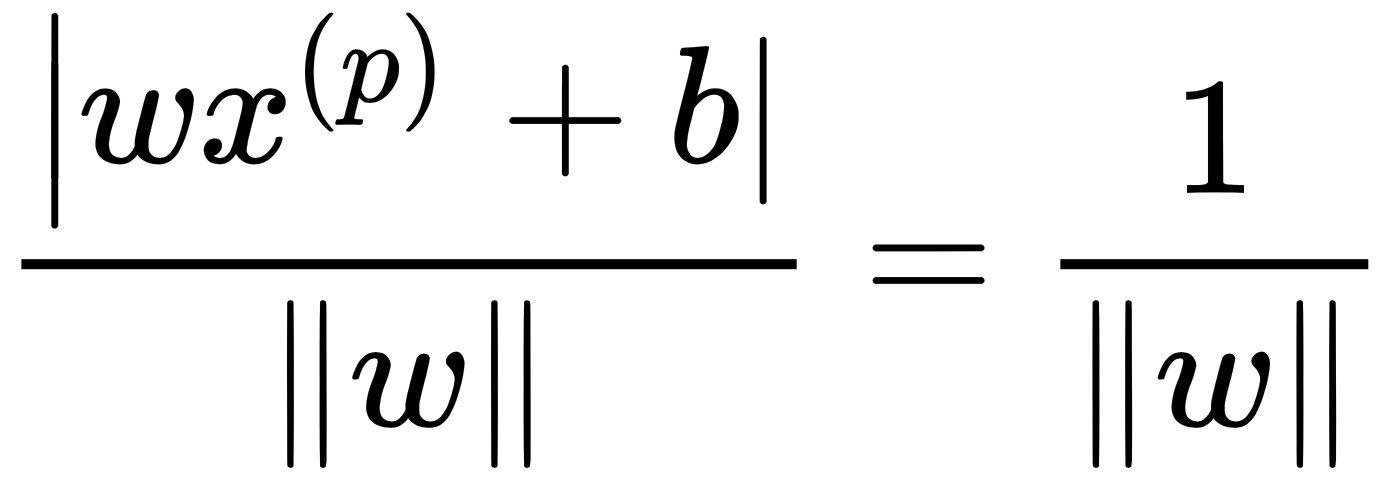

In [16]:
Image(filename='./images/svmequ1.png', width=300)

<font size="3">Similarly, the distance between a point x<sup>n</sup>  to the decision hyperplane is as follows:</font>

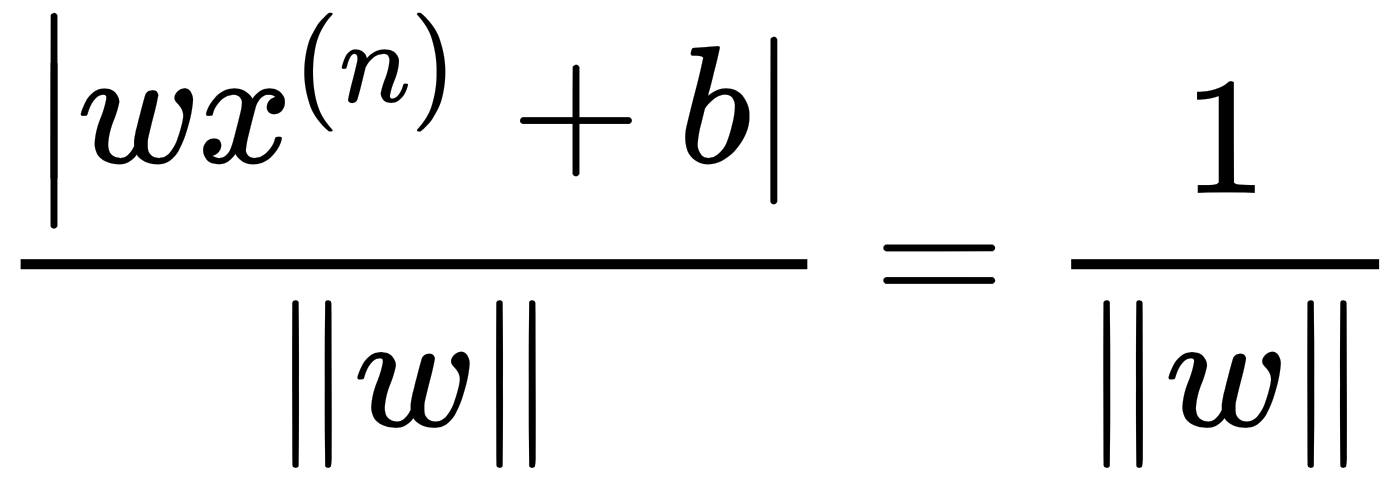

In [18]:
Image(filename='./images/svmequ2.png', width=300)

<font size="3">So the margin becomes 2/|w|. As a result, we need to minimize |w| in order to maximize the margin. Importantly, to comply with the fact that the support vectors on the positive and negative hyperplanes are the nearest data points to the decision hyperplane, we add a condition that no data point falls between the positive and negative hyperplanes:</font>

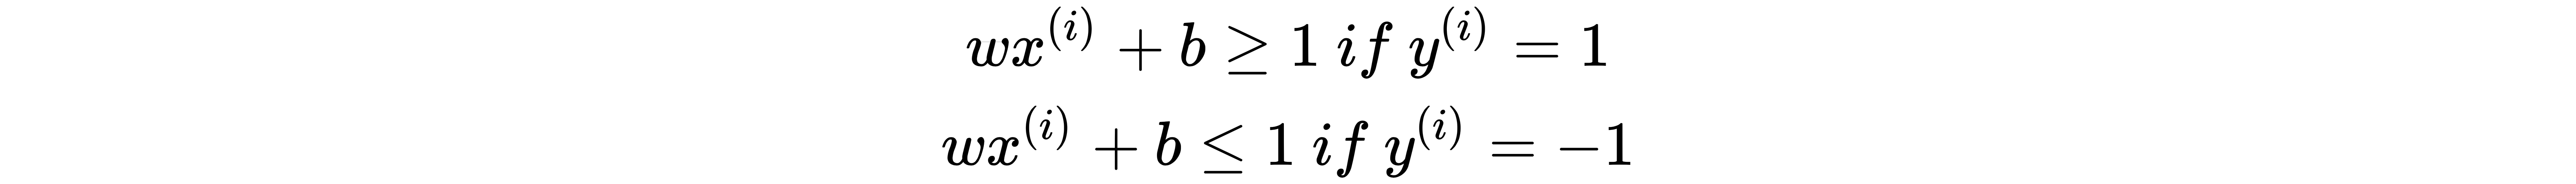

In [21]:
Image(filename='./images/svmequ3.png', width=800)

<font size="3">Here,(x<sup>i</sup> ,y<sup>i</sup>) is an observation. And this can be combined further into the following:</font>

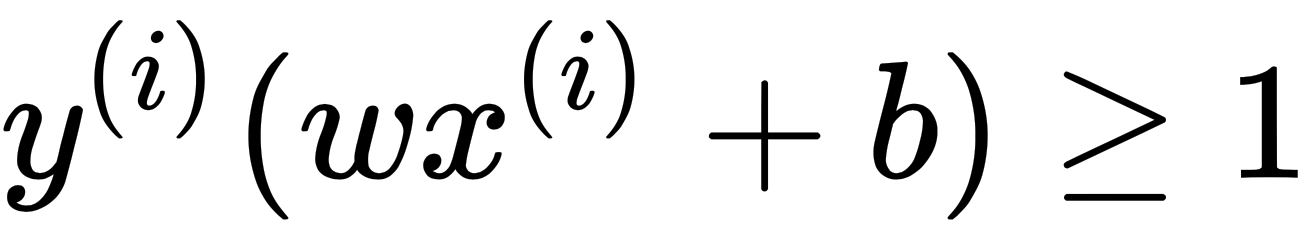

In [25]:
Image(filename='./images/svmequ4.png', width=300)

<font size="3">To summarize, w and b, which determine the SVM decision hyperplane, are trained and solved by the following optimization problem:
- Minimizing |w|
- svmequ4 diagram and training set (x(1),y(2)....(x(i)y(i))
<br><br>
The learned model parameters w and b are then used to classify a new sample x', based on the following conditions:</font>

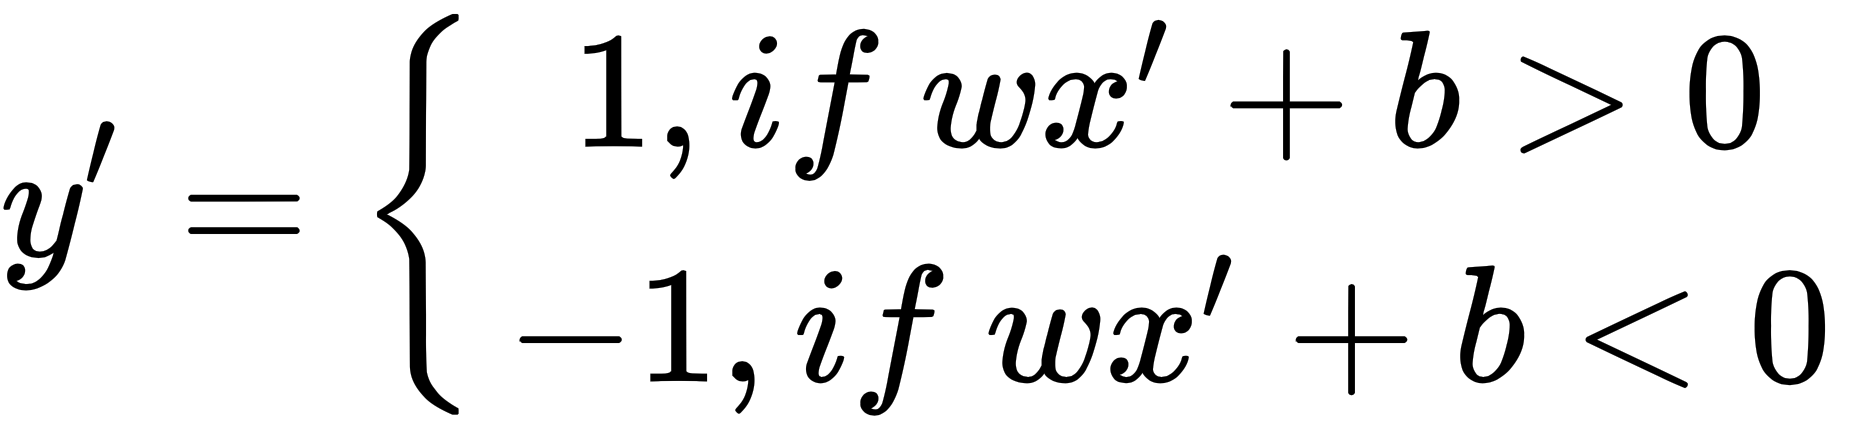

In [26]:
Image(filename='./images/svmequ5.png', width=300)

## Case 3:Handling outliers

<font size ="3">

- How can we deal with cases where it is unable to linearly segregate a set of observations containing outliers? 
- We can actually allow misclassification of such outliers and try to minimize the error  introduced. The misclassification error C<sup>(i)</sup>  (also called hinge loss) for a sample x<sup>(i)</sup> can be expressed as follows: 
</font>

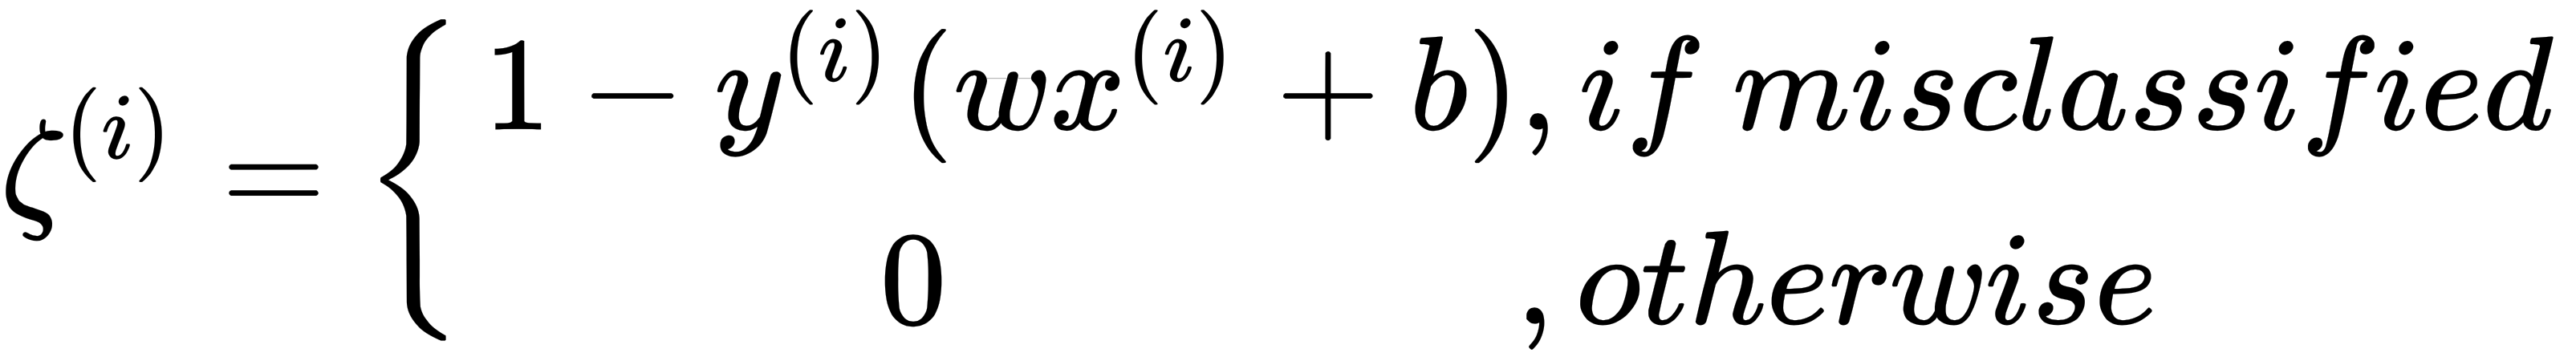

In [28]:
Image(filename='./images/svmout.png', width=400)

<font size ="3">Together with the ultimate term ‖w‖ to reduce, the final objective value we want to minimize becomes the following:</font>

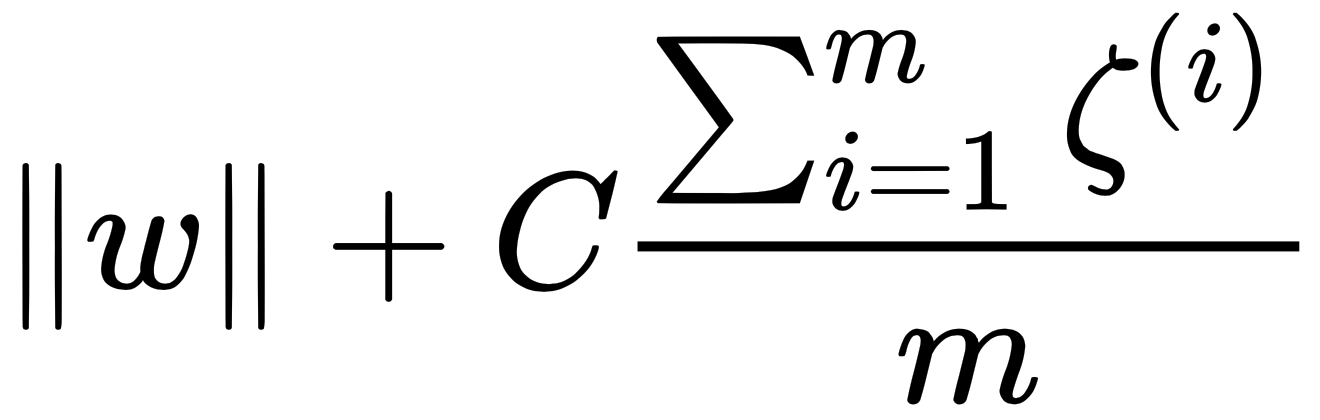

In [29]:
Image(filename='./images/svmout1.png', width=400)

<font size ="3">As regards a training set of m samples (x(1),y(2)....(x(i)y(i)) where the hyperparameter C controls the trade-off between two terms:</font>

<b>C : C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. </b>


<font size ="3" color="darkblue">
    
- If a large value of C is chosen, the penalty for misclassification becomes relatively high. It means the thumb rule of data segregation becomes stricter and the model might be prone to overfit, since few mistakes are allowed during training. An SVM model with a large C has a low bias, but it might suffer high variance.

- Conversely, if the value of C is sufficiently small, the influence of misclassification becomes fairly low. The model allows more misclassified data points than the model with large C does. Thus, data separation becomes less strict. Such a model has a low variance, but it might be compromised by a high bias.

Note : 1)A comparison between a large and small C is shown in the following diagram:<br>
2) The parameter C determines the balance between bias and variance. It can be fine-tuned with cross-validation.</font>


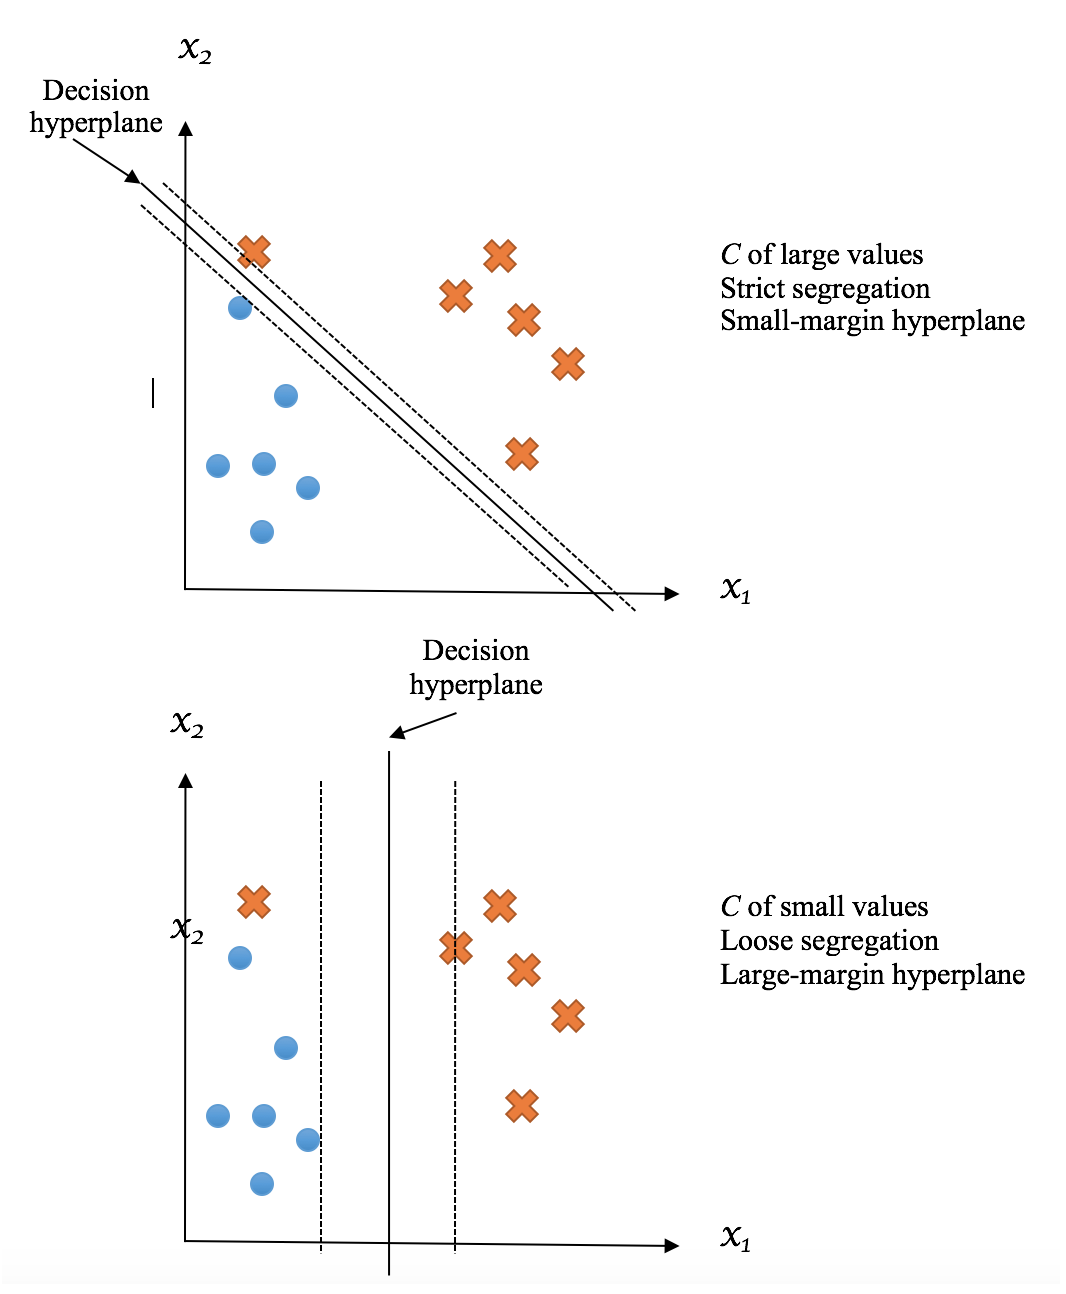

In [31]:
Image(filename='./images/svmout2.png', width=500)

## Case 4:Dealing with more than two classes

- SVM and many other classifiers can be applied to cases with more than two classes. There are two typical approaches we can take, one-vs-rest (also called one-versus-all), and one-vs-one.
- In the one-vs-rest setting, for a K-class problem, it constructs K different binary SVM classifiers. For the kth classifier, it treats the kth class as the positive case and the remaining K-1 classes as the negative case as a whole; the hyperplane denoted (wk,bk)as  is trained to separate these two cases.
- To predict the class of a new sample, x', it compares the resulting predictions  from K individual classifiers from 1 to k. As we discussed in the previous section, the larger value of  means higher confidence that x' belongs to the positive case. Therefore, it assigns x' to the class i where  has the largest value among all prediction results:

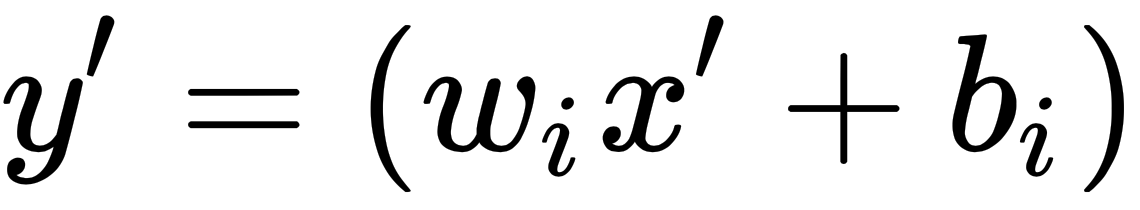

In [33]:
Image(filename='./images/svmmul.png', width=400)

The following diagram presents how the one-vs-rest strategy works in a three-class case:


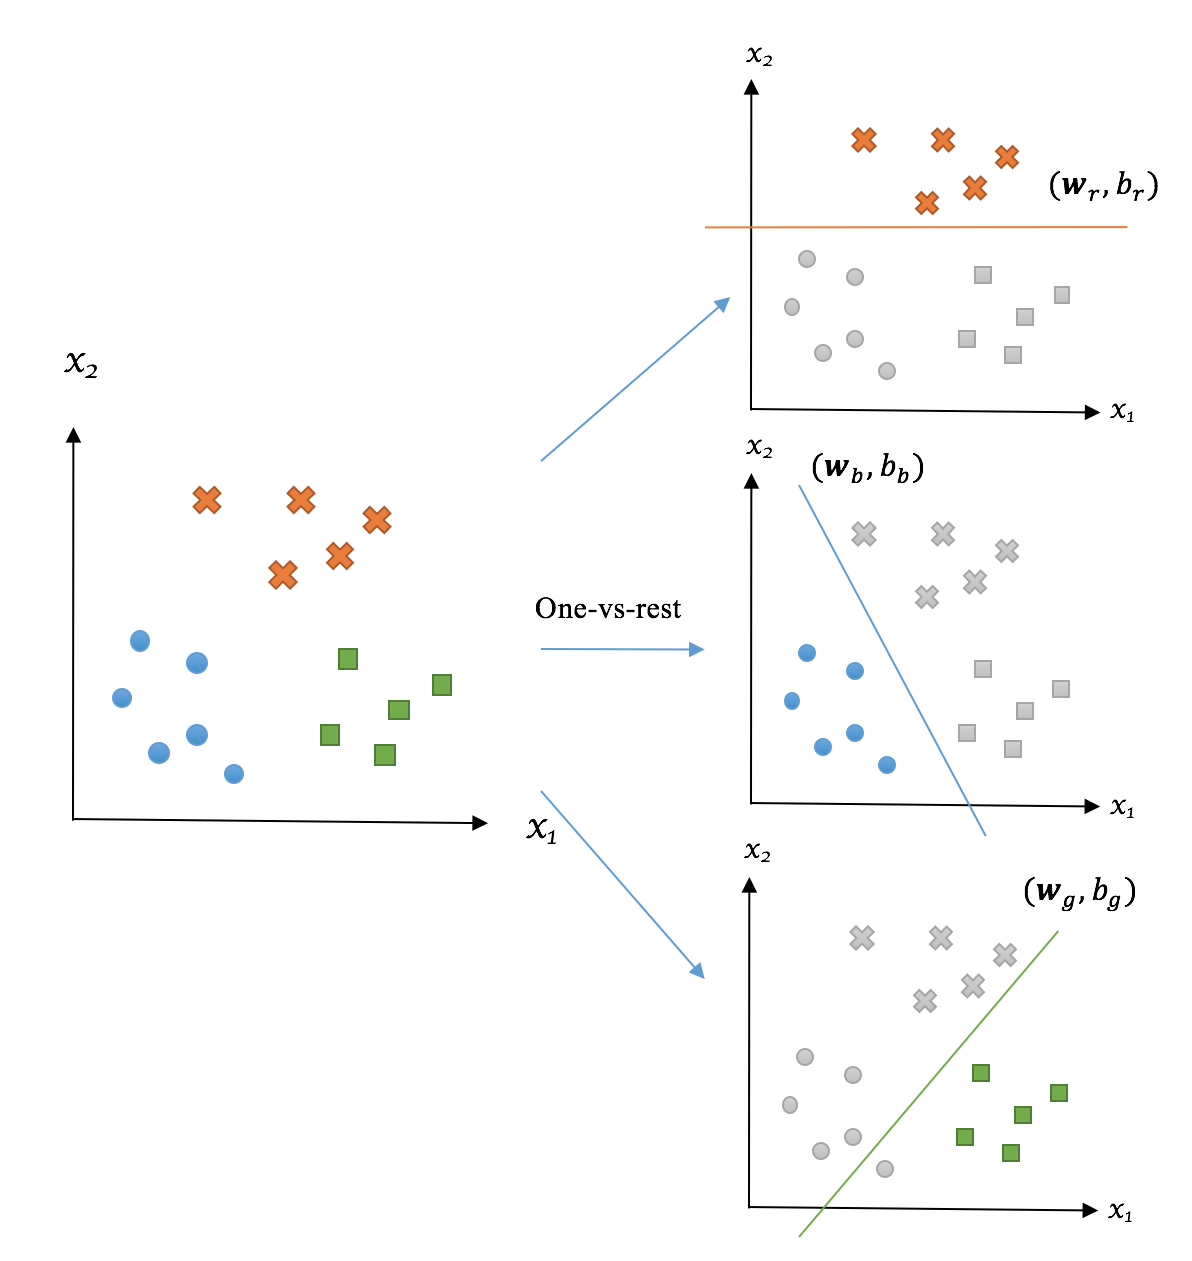

In [39]:
print("The following diagram presents how the one-vs-rest strategy works in a three-class case:")
Image(filename='./images/svmmul1.png', width=400)

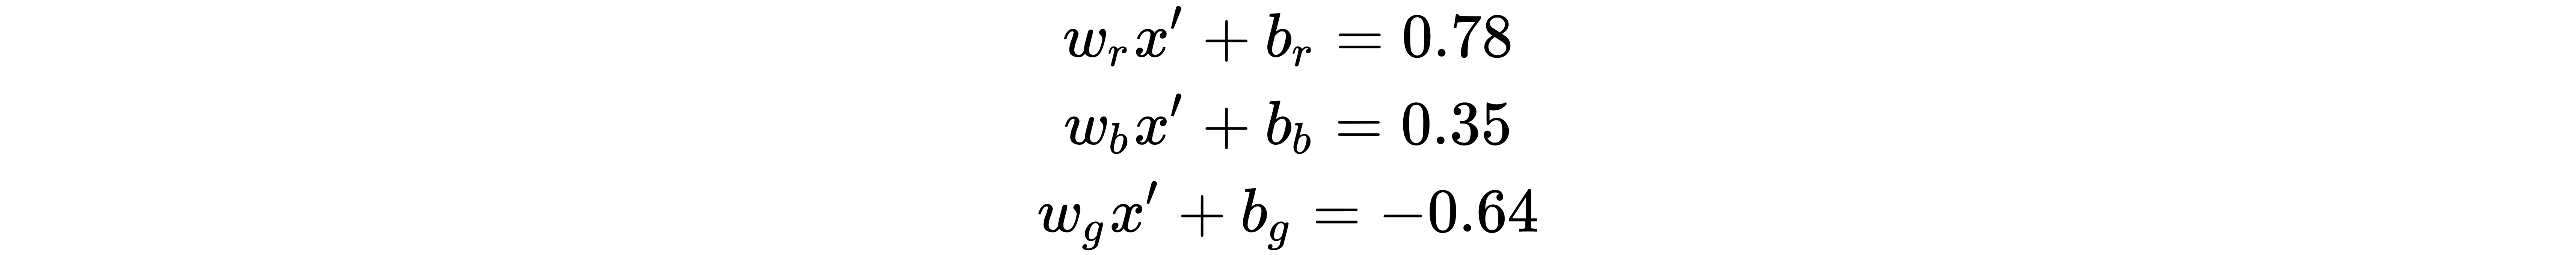

In [37]:
## Note : For instance, if we have the following (r, b, and g denote the red, blue, and green classes respectively):
Image(filename='./images/svmmul2.png', width=700)

The following diagram presents how the one-vs-one strategy works in a three-class case:


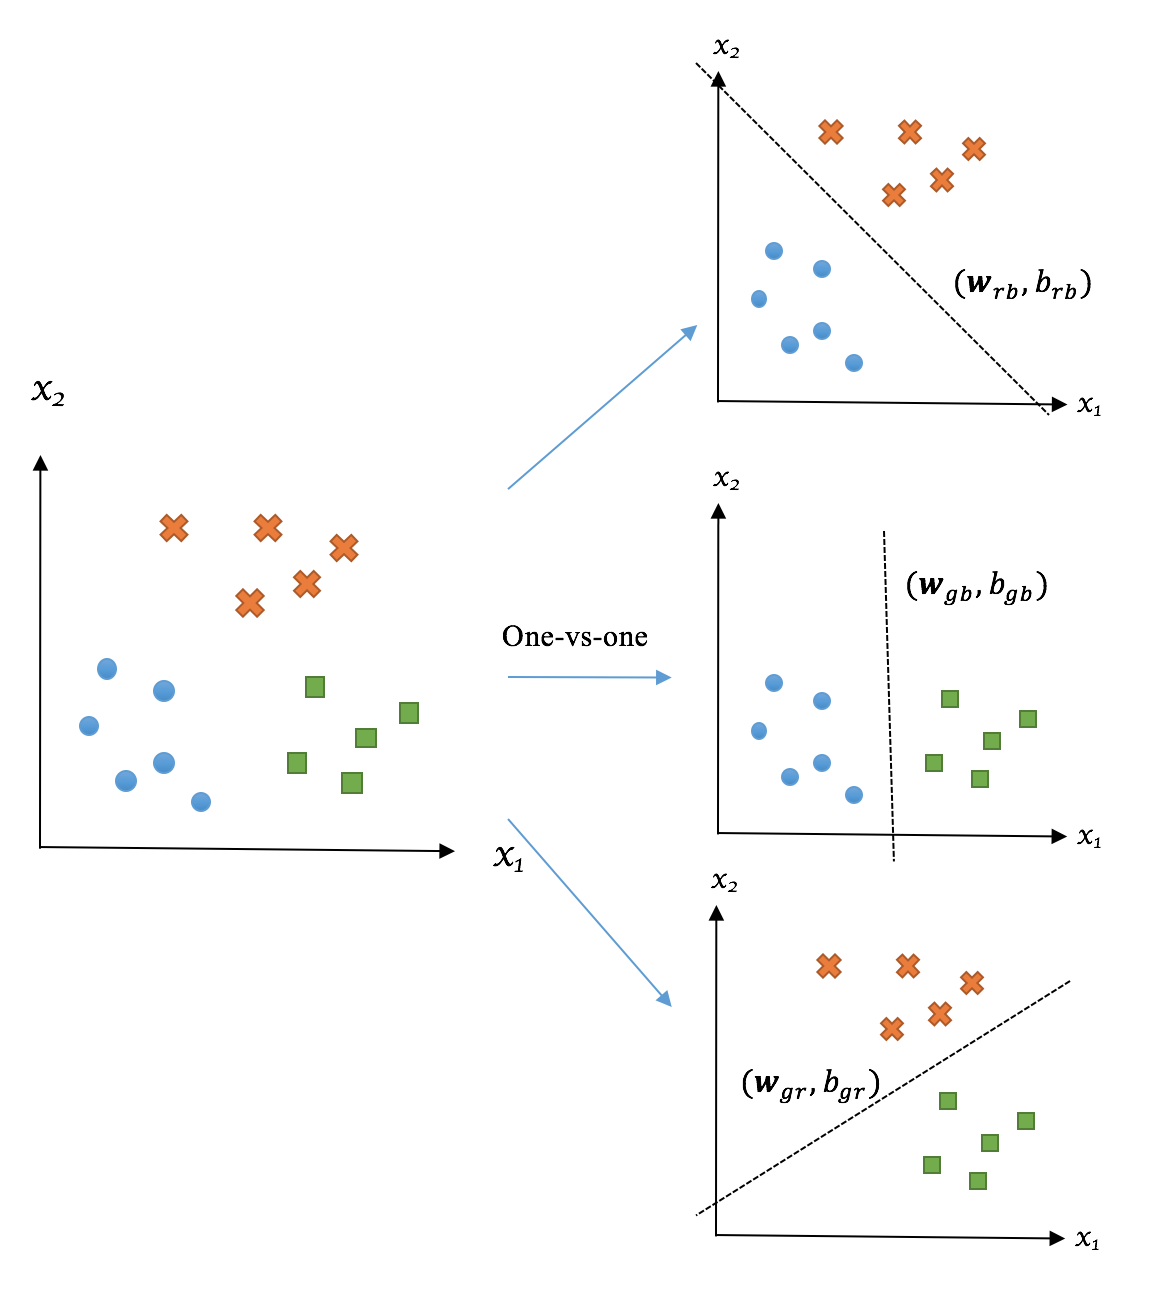

In [42]:
print("The following diagram presents how the one-vs-one strategy works in a three-class case:")
Image(filename='./images/svmmul3.png', width=500)

# The kernels of SVM

## Case 5:solving linearly non-separable problems

<font size="3">
The hyperplanes we have found up till now are linear, for instance, a line in a two-dimensional feature space, or a surface in a three-dimensional one. However, in the following example, we are not able to find any linear hyperplane that can separate two classes:
</font>

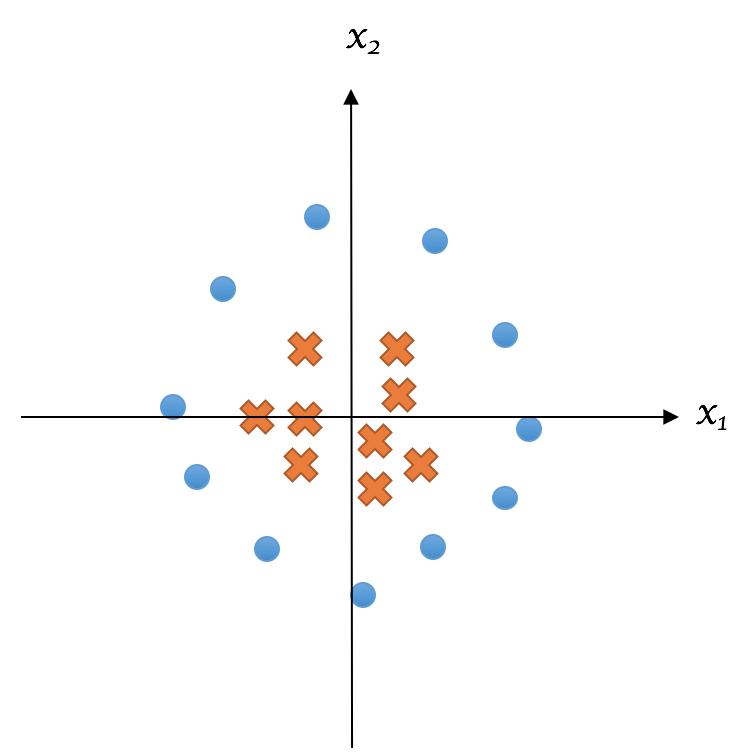

In [43]:
Image(filename='./images/svmlinear.png', width=500)

<font size="3">
    
- Intuitively, we observe that data points from one class are closer to the origin than those from another class. The distance to the origin provides distinguishable information. So we add a new feature, z = (x<sub>1</sub><sup>2</sup> + x<sub>2</sub><sup>2</sup>)  and transform the original two-dimensional space into a three-dimensional one.
- In the new space, as displayed in the following, we can find a surface hyperplane separating the data, or a line in the two-dimension view. With the additional feature, the dataset becomes linearly separable in the higher dimensional space, (x<sub>1</sub> , x<sub>2</sub>,z)
</font>

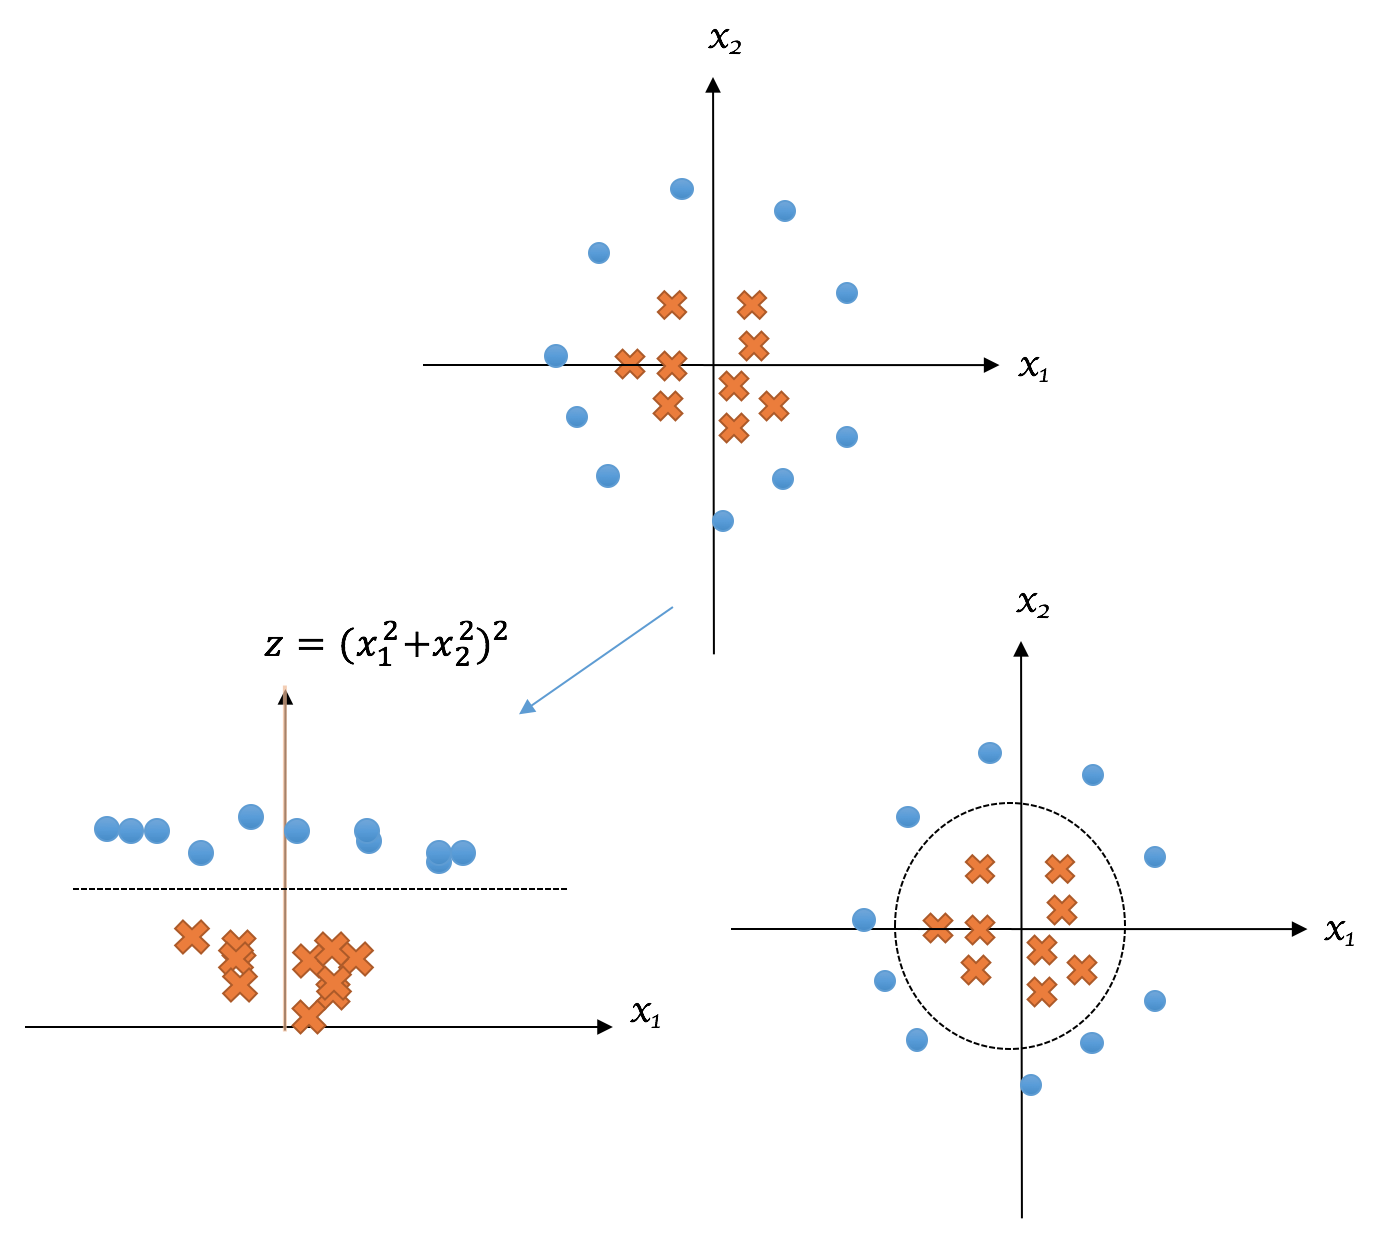

In [44]:
Image(filename='./images/svmlinear1.png', width=500)